In [136]:
#Importamos las librerias que utiizaremos inicialmente.
# A medida que iremos avanzando importaremos mas librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## *Pasaremos a convertir los CSV a DataFrame para iniciar el procesamiento de los datos*

*Buscaremos valores null y caulquier otra impureza que tengan nuestros datos*

In [137]:
df_train = pd.read_csv('properties_colombia\properties_colombia_train.csv')
df_train.head()

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,2020-12-14,6.203000,-75.572000,Colombia,Antioquia,...,NaN,NaN,9.000000e+09,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203)
1,200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,Colombia,Cundinamarca,...,NaN,NaN,6.250000e+08,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485)
2,554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,2020-08-19,4.709000,-74.030000,Colombia,Cundinamarca,...,NaN,NaN,4.200000e+08,COP,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709)
3,540321,hELQ9njwODbLMpATXieRdQ==,Propiedad,2020-11-23,2020-11-30,2020-11-23,NaN,NaN,Colombia,Santander,...,NaN,NaN,1.310000e+09,COP,NaN,SE VENDE LOCAL COMERCIAL EN CABECERA DEL LLANO...,Se encuentra ubicado en el sector de la Cabece...,Otro,Venta,POINT EMPTY
4,448920,aBCtKT7LDzt2CxJQ+gVFEA==,Propiedad,2020-10-06,2020-10-07,2020-10-06,NaN,NaN,Colombia,Antioquia,...,NaN,NaN,2.100000e+08,COP,NaN,Apartamento en Venta Ubicado en ITAGUI,Codigo Inmueble 4302 Apartamento con 3 habitac...,Apartamento,Venta,POINT EMPTY


In [138]:
df_test = pd.read_csv('properties_colombia\properties_colombia_test.csv')


In [139]:
df_train['bedrooms'].dtype

dtype('float64')

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4512\4256483647.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_train.corr()


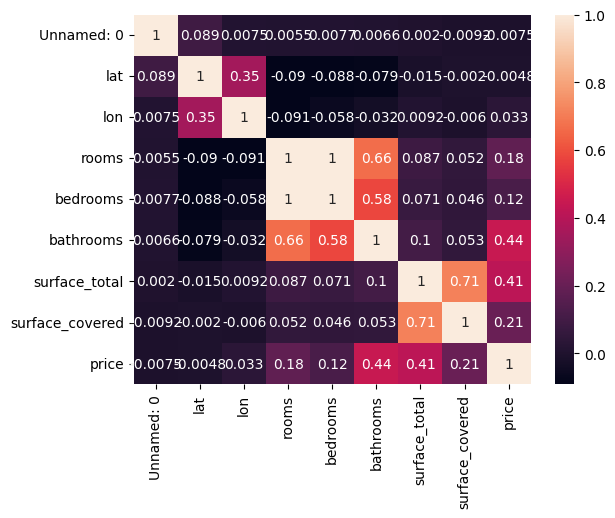

In [140]:
df_train.columns
corr = df_train.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True);

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4512\2904342954.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_test.corr()


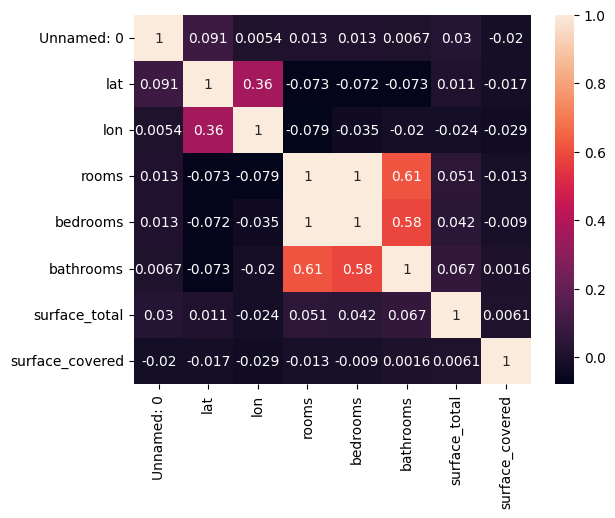

In [141]:
df_test.columns
corr = df_test.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True);

## *Limpieza de datos ETL*

In [142]:
df_train['lon'].isna().sum()

49498

In [143]:
df_train['lon'].describe()

count    148051.000000
mean        -75.041045
std           1.104575
min        -119.698190
25%         -75.645126
50%         -75.476654
75%         -74.094001
max         -67.482570
Name: lon, dtype: float64

In [144]:
#Empezamos con la limpieza del test y luego las feacture de train
# Estas son las Feactures que usaremos para entrenar nuestro modelo
df_test['surface_total'].fillna(1352.13, inplace = True)
df_test['surface_covered'].fillna(9.483356e+02, inplace = True)
df_test['bedrooms'].fillna(3.239062, inplace = True)
df_test['bathrooms'].fillna(2.639279, inplace = True)
df_test['lat'].fillna(4.907624, inplace = True)
df_test['lon'].fillna(-55.577415, inplace = True)

# Train
df_train['surface_total'].fillna(1352.13, inplace = True)
df_train['surface_covered'].fillna(9.483356e+02, inplace = True)
df_train['bedrooms'].fillna(3.239062, inplace = True)
df_train['bathrooms'].fillna(2.639279, inplace = True)
df_train['lat'].fillna(4.907624, inplace = True)
df_train['lon'].fillna(-55.577415, inplace = True)

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4512\4256483647.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_train.corr()


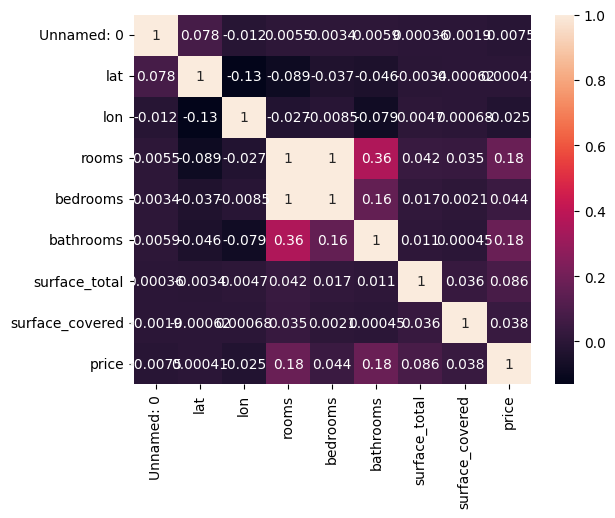

In [145]:
df_train.columns
corr = df_train.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True);

*Creamos una columna con el nombre target donde contenga con variables categoricas (0 y 1), donde 0 es economico y 1 es caro*

In [146]:
df_train['target']= np.where(df_train['price'] >= df_train['price'].mean(), 1, 0)
df_train['target'].value_counts()

0    151191
1     46358
Name: target, dtype: int64

In [147]:
# Estas feactures utilizaremos en el entrenamiento de nuestro modelo
X = df_train[['lat', 'lon', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']]
y = df_train['target']

In [148]:
test = df_test[['lat', 'lon','bedrooms', 'bathrooms', 'surface_total', 'surface_covered']]

## *Entrenamos   -KVecinos*

In [149]:
#from sklearn.model_selection import train_test_split
#X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42) 

In [150]:
#from sklearn.preprocessing import StandardScaler
#st_sc = StandardScaler()
#X_train = st_sc.fit_transform(X_train)

In [165]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X.values,y.values)

KNeighborsClassifier()

In [166]:
from sklearn.metrics import confusion_matrix, classification_report

## *Predecimos*

In [167]:
y_pred = clf.predict(X.values)

In [168]:
y_pred.shape[0]

197549

In [169]:
test_pred = clf.predict(test.values)

In [170]:
test_pred.shape[0]

65850

In [171]:
test_pred = pd.DataFrame(test_pred)
test_pred.rename({0 : 'pred'}, axis  = 1, inplace = True)

In [172]:
test_pred.head()

,pred
0,1
1,0
2,0
3,0
4,0


In [173]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

In [174]:
def metricas_precision(valor1, valor2):
    """ Recibe como valores y e y_pred"""
    acurracy = accuracy_score(y,y_pred)
    recall = recall_score(y,y_pred)
    f1 = f1_score(y,y_pred)
    precision = precision_score(y,y_pred)
    return acurracy, recall, f1, precision

In [175]:
metricas_precision(X, y_pred)

(0.8979999898759295,
 0.7358600457310497,
 0.7719969222413324,
 0.8118663429958589)

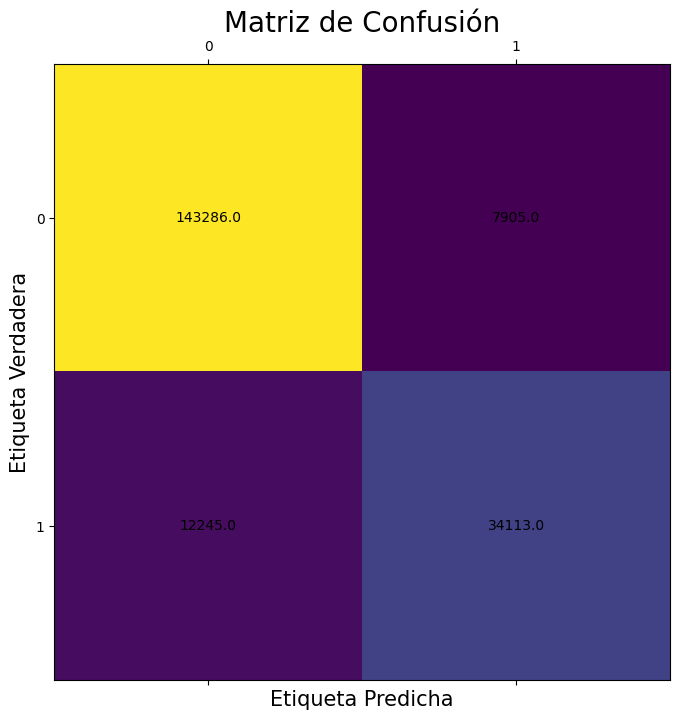

In [176]:
cm = confusion_matrix(y, y_pred)

fig, ax = plt.subplots(figsize=(12,8))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [177]:
carga = r'C:\Users\USUARIO\Desktop\Trabajos independientes\PI02\Datathon-main\Entrega\Luismadrid77.csv'
test_pred.to_csv(carga, index = False)